# 1.EDA(Exploratory Data Analysis)
Example:
    - Shape(Training size,Test size)
    - Label(Binary or Multi or Regression,Distribution)
    - Columns(Meaning,Numerical or Time or Category)
    - Null Values,how to deal with
    - Numerical variable:Distribution
    - Outliers

In [1]:
import pandas as pd
pd.set_option('display.max_column',100)
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
#plt.figure(figsize=(14,10))
import numpy as np
import seaborn as sns

#可以忽略plt.show()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# simple eda ways

In [3]:
data = pd.read_csv('data/creditcard.csv')
#都5行数据
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#数据维度
data.shape

(284807, 31)

In [4]:
#数据字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
#数据列信息
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#数据统计描述,仅数值型
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#数据类别字段计数
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#空值查看
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#包含缺失最多的一列有多少
data.isnull().sum().max()

0

In [10]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
#数据中是否有缺失值
data.isnull().values.any()

False

# Amount-histogram

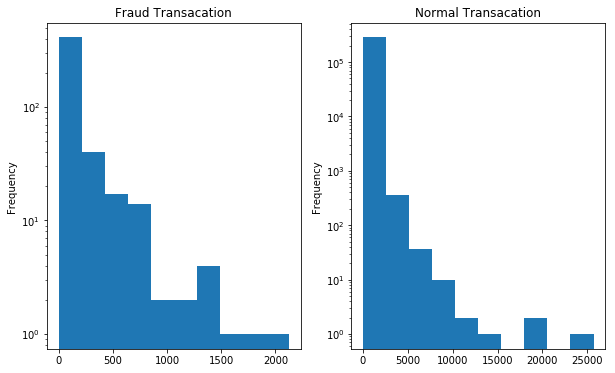

In [12]:
#交易总金额分布直方图
Fraud_transacation = data[data["Class"]==1]
Normal_transacation = data[data["Class"]==0]
plt.figure(figsize=(10.,6))
#subplot()参数也可以用逗号,分隔开。第一个参数代表子图的行数；第二个参数代表该行图像的列数； 第三个参数代表每行的第几个图像
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
#Fraud_transacation.plot.hist(title="Fraud Transacation")

plt.yscale('log')
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transacation")
plt.yscale('log')

#  Amount-Time

Text(0, 0.5, 'Amount()')

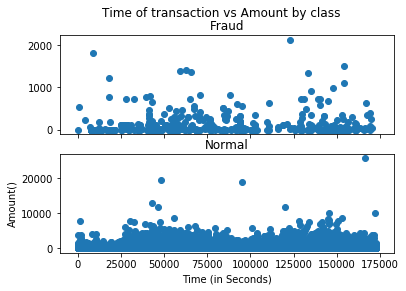

In [13]:
#返回figure和元组ax，分成两行一列，元组内两个元素，x轴共享
f,(ax1,ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud_transacation.Time,Fraud_transacation.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal_transacation.Time,Normal_transacation.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount()')

# correlation

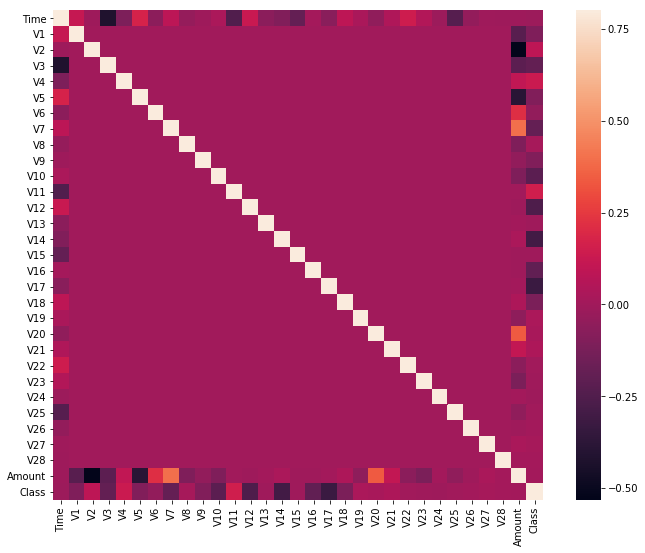

In [14]:
#计算相关系数矩阵
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)

#从下图得知Amount，Class，Time影响时间

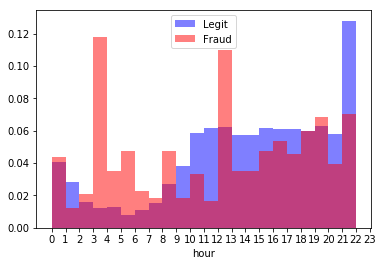

In [15]:
#时间序列
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
data['hour'].value_counts()
data.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html

#只有0-22的hour
bins = np.arange(data['hour'].min(),data['hour'].max())
#plt.figure(figsize=(15,4))
sns.distplot(data[data['Class']==0]['hour'],
            norm_hist=True,
            bins=bins,
            kde=False,
            color='b',
            hist_kws={'alpha':.5},
            label='Legit')
sns.distplot(data[data['Class']==1]['hour'],
            norm_hist=True,
            bins=bins,
            kde=False,
            color='r',
            label='Fraud',
            hist_kws={'alpha':0.5})
plt.xticks(range(0,24))
plt.legend()

In [16]:
# https://github.com/pandas-profiling/pandas-profiling
#cpu占用太高
import pandas_profiling

#profile = data.profile_report(title="Credit Fraud Detector")
#profile.to_file(output_file=Path("./credit_fraud_detector.html"))

## EDA conclusion
 - The data set is highly skewed,consisting of 492 frauds in a total of 284807 observations.This resulted in only 0.172% fraud cases.
 - There is no missing value in the dataset
 - The 'Time' and 'Amount' features are not transformed data.

## Why taking log transformation of continuous variable?
 Amount distribution is "power low",meaning that the vast majority of amount are small and very few are big.
 \begin{array}{c}{\log \left(10^{4}\right)=4 * \log (10)} \\ {\log \left(10^{3}\right)=3 * \log (10)} \\ {10^{4}-10^{3}} \\ {4-3}\end{array}
 
log(10^4)=4∗log(10)  
log(10^3)=3∗log(10)  
10^4−10^3  
4−3  

\begin{array}{c}{\log \left(10^{5}\right)=5* \log (10)} \end{array}
which transforms a huge difference in a smaller one. Logarithm naturally reduces the dynamic range of a variable so the differences are preserved while the scale is not that dramatically skewed.

# Outliers Detection
 - Point anomalies: A single instance of data is anomalous if it's too far off from the rest.
 - Contextual anomalies: The abnormality is context specific. This type of anomaly is common in time-series data.
 
 \begin{array}{c}
 \mathrm {IQR}=Q_{3}-Q_{1} \\
 \text{Outliers}: >Q_3+k \cdot IQR \\
 \text{Outliers}: <Q_1-k \cdot IQR
 \end{array}
 
 The higher kk is (ex: 3), the less outliers will detect, and the lower kk is (ex: 1.5) the more outliers it will detect.

<font color=red size=5>We want to focus more on "extreme outliers" rather than just outliers.</font>

# Unbalance

Text(0, 0.5, 'Frequency')

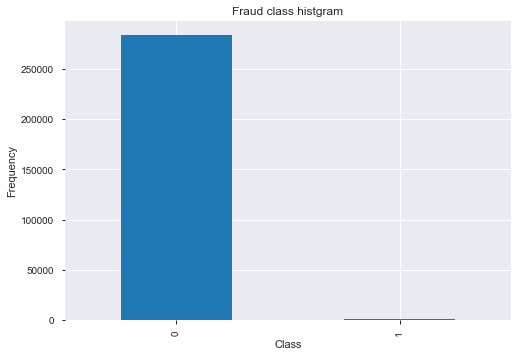

In [17]:
df = data
count_classes = pd.value_counts(df['Class'],sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud class histgram")
plt.xlabel("Class")
plt.ylabel("Frequency")

1.collect more data  
2.using the weight parameters

In [18]:
LogisticRegression(class_weight='balanced')
#how to choose wrights?

NameError: name 'LogisticRegression' is not defined

In [ ]:
LogisticRegression(class_weight={0:1,1:100})

In [ ]:
wights=list({1,1,1,1,2,1,3,1,1})

正负样本 1:1 4:6  
different weight plot metric

用于标示分类模型中各种类型的权重，可以是一个字典或者’balanced’字符串，默认为不输入，也就是不考虑权重，即为None。如果选择输入的话，可以选择balanced让类库自己计算类型权重，或者自己输入各个类型的权重。举个例子，比如对于0,1的二元模型，我们可以定义class_weight={0:0.9,1:0.1}，这样类型0的权重为90%，而类型1的权重为10%。如果class_weight选择balanced，那么类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。当class_weight为balanced时，类权重计算方法如下：n_samples / (n_classes * np.bincount(y))。n_samples为样本数，n_classes为类别数量，np.bincount(y)会输出每个类的样本数，例如y=[1,0,0,1,1],则np.bincount(y)=[2,3]。

Changing the performance metric:  
2.1 Precision, Recall  
2.2 F1-score  
2.3 ROC curves  
Resampling the dataset  
3.1 OVER-sampling  
3.2 UNDER-sampling  
3.3 SMOTE  

# Metrics
 - True Positives : The cases in which we predicted YES and the actual output was also YES.
 - True Negatives : The cases in which we predicted NO and the actual output was NO.
 - False Positives : The cases in which we predicted YES and the actual output was NO.
 - False Negatives : The cases in which we predicted NO and the actual output was YES.
 
![title](img/confusion_matrix.jpg)

In [ ]:
## homework ##

def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true==1)&(y_pred==1))
def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true==1)&(y_pred==0))
def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true==0)&(y_pred==1))
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true==0)&(y_pred==0))

def find_conf_matrix_values(y_true,y_pred):
     # calculate TP, FN, FP, TN
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN
def my_confusion_matrix(y_true,y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label,prediction)

## Accuracy
\begin{array} \text{Accuracy}=\frac{\text{True Positives}+\text{True Negatives} }{\text{Total Number of Predictions}} \end{array}  
    
- It works well only if there are equal number of samples belonging to each class.

In [19]:
# homework
def my_accuracy_score(y_true, y_pred):
    # calculates the fraction of samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return (TP+TN)/(TP+TN+FP+TN)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(label,prediction)

NameError: name 'label' is not defined

## Precision
\begin{array} \text{Recall}=\frac{\text{True Positives}}{\text{True Positives}+\text{False Positives}}\end{array}


In [22]:
#homework
def my_precision_score(y_true,y_pred):
    # calculates the fraction of predicted positives samples that are actually positive
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return TP/(TP+FP)

In [23]:
from sklearn.metrics import precision_score
precision_score(label, prediction)

NameError: name 'label' is not defined

## Recall
\begin{array} \text{Precision}=\frac{\text{True Positives}}{\text{True Positives}+\text{False Positives}}\end{array}


In [25]:
#homework
def my_recall_score(y_true,y_pred):
    # calculates the fraction of positive samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return TP/(TP+FP)

In [27]:
from sklearn.metrics import recall_score
recall_score(label, prediction)

NameError: name 'label' is not defined

## F1 Score
The F1 score is the harmonic mean(调和平均) of recall and precision,with a higher score as a better model
\begin{array} \tetx{F1}=\frac{2}{\frac{1}{\text { precision }}+\frac{1}{\text { recall }}}=\frac{2 * \text { (precision * recall) }}{\text { precision }+\text {recall}} \end{array}

In [30]:
#homework 
def my_f1_score(y_true,y_pred):
    # calculates the F1 score
    recall = my_recall_score(y_true,y_pred)
    precision = my_precision_score(y_true,y_pred)
    return (2*(precision*recall))/(precision+recall)

In [32]:
from sklearn.metrics import f1_score
f1_score(label, prediction)

NameError: name 'label' is not defined

We often assume that we defined a threshold of 0.5 for selecting which samples are predicted as positive. If we change this threshold the performance metrics will change. It would be nice to be able to evaluate the performance of a model without the need to select an arbitrary threshold. This is precisely what AUC-ROC is providing  
Area Under Curve (AUC)–Area Under the curve of the Receiver Operating Characteristic (AUROC)  
AUC is used for binary classification problem.
- True Positive Rate (Sensitivity) : the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.
 \begin{array} \text{True Positive Rate}=\frac{\text{True Positives}}{\text{True Positives}+\text{False Negatives}} \end{array}
- False Positive Rate (Specificity) : the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.
\begin{array} \text{False Positive Rate}=\frac{\text{False Positives}}{\text{False Positives}+\text{True Negatives}} \end{array}

FPR and TPR bot hare computed at threshold values such as (0.00, 0.02, 0.04, …., 1.00)(0.00,0.02,0.04,….,1.00) and a graph is drawn. AUC is the area under the curve of plot False Positive Rate vs True Positive Rate at different points in [0, 1][0,1]. The resulting curve is called ROC curve (Receiver Operating Characteristic curve).


In [33]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(label,prediction)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(label,prediction)

NameError: name 'label' is not defined

![title](img/Receiver_operating_characteristic_example.png)

In [39]:
from numba import jit

@jit
def fast_auc(y_true,y_prob):
    y_true = np.asarray(y_true)
    #np.argsort()返回排序后索引值
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i*nfalse
    auc /=(nfalse*(n-nfalse))
    return auc

In [43]:
## test speed
y_true = np.random.randint(0,2,1000000)
y_pred = np.random.rand(1000000)

fast_auc(y_true, y_pred)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

y_true
%timeit fast_auc(y_true, y_pred)
%timeit roc_auc_score(y_true, y_pred)


139 ms ± 490 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
378 ms ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Mean Absolute Error(MAE)
\begin{array} \text{MAE}=\frac{1}{N} \sum_{j=1}^{N}\left|y_{j}-\hat{y}_{j}\right| \end{array}
  
## Mean Squared Error(MSE)
\begin{array} \text {MSE}=\frac{1}{N} \sum_{j=1}^{N}\left(y_{j}-\hat{y}_{j}\right)^{2} \end{array}
  
##   Log Loss
AUC only takes into account the order of probabilities and hence it does not take into account the model’s capability to predict higher probability for samples more likely to be positive.

\begin{array} \text {Log Loss}=-\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{i j} * \log \left(p(y_{i j})\right) \end{array}
- $ y_{i j} $ : whether sample ii belongs to class jj or not
- $ p(y_{i j}) $: the probability of sample ii belonging to class jj
\begin{array} \text {Log Loss}=-\frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot \log \left(p\left(y_{i}\right)\right)+\left(1-y_{i}\right) \cdot \log \left(1-p\left(y_{i}\right)\right) \end{array}